# Usable Artificial Intelligence
## Final Project
### Problem 2

**By:**

**Gandhar Ravindra Pansare (gpansar)**

**Raj Dhake (rajdhake)**

**Sarthak Choudhary (sarchou)**

# EmoNet: Advanced Emotion Classification Using NLP Techniques
## Problem Statement:

Create an advanced emotion classification model leveraging state-of-the-art Natural Language Processing (NLP) techniques to accurately identify and categorize emotions expressed in textual data. The objective is to develop a model capable of effectively predicting the emotional sentiment associated with each document in a given dataset. This entails training the model on a diverse corpus of documents annotated with corresponding emotion labels and optimizing its performance to achieve high accuracy and robustness in classifying emotions across various contexts. The resulting model should exhibit superior capabilities in understanding and interpreting nuanced emotional nuances, enabling its application in a wide range of real-world scenarios such as sentiment analysis, customer feedback analysis, and mood detection in conversational interfaces.

## Aim:

- Develop a high-performing emotion classification model using NLP techniques to accurately categorize emotions expressed in textual data.

## Dataset Attributes

- Text Data: Each entry contains a piece of text representing a statement or expression of emotion. These textual documents vary in length and content, reflecting the diverse range of emotional experiences.

- Emotion Label: The emotion label indicates the predominant emotion conveyed in the corresponding text data. Emotions such as sorrow, rage, happiness, amaze, care, and scare are represented in the dataset.

# Load Dataset

In [73]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
from gensim.models import Word2Vec
from collections.abc import Mapping
from gensim import corpora, models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc, balanced_accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [74]:
#Loading the dataset
data_path = 'train.csv'
data_problem2 = pd.read_csv(data_path)

#Displaying the first few rows of the dataset to understand its structure
data_problem2.head()

,Text,Emotion
0,i didnt feel humiliated,sorrow
1,i can go from feeling so hopeless to so damned...,sorrow
2,im grabbing a minute to post i feel greedy wrong,rage
3,i am ever feeling nostalgic about the fireplac...,care
4,i am feeling grouchy,rage


# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

# Question 1 : Data Analysis (10 pt)

- Describe the dataset, including the number of entries (documents) present.
- Determine the frequency of each emotion category in the dataset.
- Utilize visualizations such as bar charts or pie charts to display the distribution of emotions in the dataset.
- Interpret the statistical plots to extract meaningful insights that can inform the development of the EmoNet model.

In [75]:
#Checking number of entries in the document
num_entries_p2 = data_problem2.shape[0]
print('Number of entries in the dataset are: ',num_entries_p2)

Number of entries in the dataset are:  15000


In [76]:
#Determining the frequency of each emotion category in the dataset
emotion_counts_p2 = data_problem2['Emotion'].value_counts()
emotion_counts_p2

Emotion
happiness    5034
sorrow       4368
rage         2016
scare        1817
care         1223
amaze         542
Name: count, dtype: int64

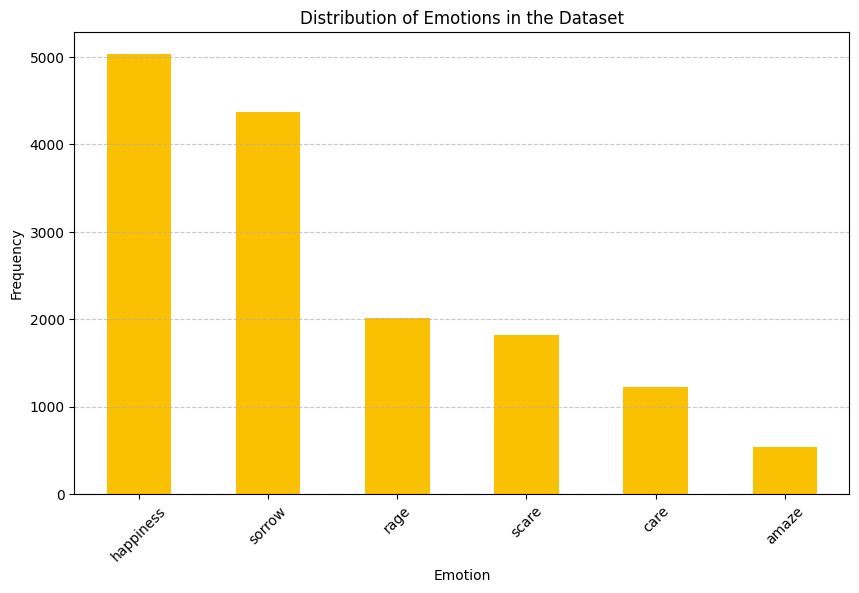

In [77]:
#Visualization - Bar Graph
plt.figure(figsize=(10, 6))
emotion_counts_p2.plot(kind='bar', color='#fac002')
plt.title('Distribution of Emotions in the Dataset')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart above displays the frequency distribution of emotions in the dataset.

#### Interpretation

**Dominant Emotions:** Happiness and sorrow are the most frequently occurring emotions, suggesting that the dataset is particularly rich in expressions related to these emotions. This could allow the EmoNet model to perform well in identifying these emotions due to the abundance of training examples.
<br>

**Rare Emotions:** Amaze is the least represented emotion, which might challenge the model to recognize this emotion due to fewer training samples. Rage, scare, and care also have less frequency than happiness and sorrow but are still higher in number as compared to Amaze.
<br>

**Model Training Implications:** The imbalance in emotion representation could lead to a bias towards more frequent emotions. It may be necessary to consider techniques such as oversampling the underrepresented classes or adjusting class weights during the training of the EmoNet model to ensure that it performs equally well across all emotion categories.

In [78]:
#Checking NA Values
data_problem2.isna().sum()

Text       0
Emotion    0
dtype: int64

# Question 2: Data pre-processing & Feature Engineering (10 points)

- Preprocess the text data to remove noise and irrelevant information, such as punctuation, special characters, and stop words.
- Perform tokenization to break down the text data into individual words or tokens.
- Using the provided dataset, create a word cloud to visualize the frequency of words in the text. Describe the process you followed to create the word cloud.
- Experiment with different text representation techniques, such as frequency vector, TF-IDF (Term Frequency-Inverse Document Frequency)to transform the text data into numerical features that can be used by machine learning models.
### Extra credit if you perform word embeddings (e.g., Word2Vec, GloVe) to transform the text data into numerical features that can be used by machine learning models.

#### Pre-processing the text

In [79]:
#Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

#Setting stopwords to English
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    #Lowercasing the text
    text = text.lower()
    #Removing URL and HTML href tags
    text = re.sub(r'http',' ', text)
    text = re.sub(r'href',' ', text)
    #Removing email
    text = re.sub(r'\b[\w.-]+?@\w+?\.\w{2,4}\b','', text)
    #Removing non-letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    #Tokenization
    tokens = word_tokenize(text)
    #Removing stopwords
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

#Applying the preprocessing function
data_problem2['Processed_Text_p2'] = data_problem2['Text'].apply(preprocess_text)

#Reapplying preprocessing to get the list of tokens (this might be useful for future model training)
data_problem2['Tokenized_Text_p2'] = data_problem2['Text'].apply(preprocess_text)

#Displaying the first few five of the processed text
print(data_problem2[['Text', 'Processed_Text_p2']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                   Processed_Text_p2  
0                          [didnt, feel, humiliated]  
1  [go, feeling, hopeless, damned, hopeful, aroun...  
2  [im, grabbing, minute, post, feel, greedy, wrong]  
3  [ever, feeling, nostalgic, fireplace, know, st...  
4                                 [feeling, grouchy]  


**Preprocessing Details:**
For this problem, we have removed URLs, emails, non letters and stopwords from the text. Further we have converted all the text to lowercase and then applied tokenization as displayed in the output above.

#### Wordcloud Generation

In [80]:
#Transforming tokens into a single string entry for wordcloud generation
data_problem2['Processed_Text_p2'] = data_problem2['Processed_Text_p2'].apply(lambda tokens: ' '.join(tokens))

#Generating the word cloud
wordcloud_p2 = WordCloud(width=800, height=800, background_color='white',
                         stopwords=stop_words, min_font_size=10).generate(' '.join(data_problem2['Processed_Text_p2']))

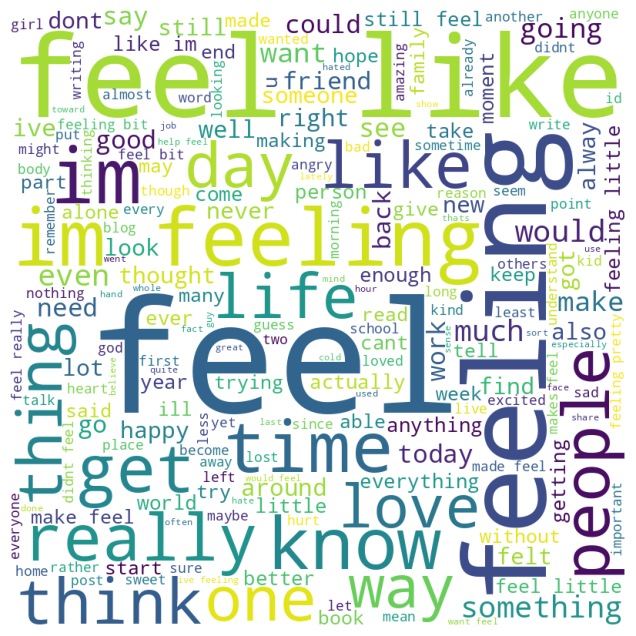

In [81]:
#Displaying the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_p2)
plt.axis("off")
plt.show()

Steps to create the above visualization

- **Transforming Tokens into Strings:** We converted each list of tokens in the 'Processed_Text' column into a single string using the .apply() method with a lambda function that joins the tokens with spaces.
<br>

- **Generating the Word Cloud:** Using the WordCloud class from the wordcloud library, we created a word cloud from the concatenated strings of processed text. Parameter like image size, background color, stopwords, and minimum font size were set for the visualization.
<br>

- **Displaying the Word Cloud:** We displayed the generated word cloud using matplotlib, setting the figure size, turning off-axis visibility, and then showing the image.

**Wordcloud Description:**

The word cloud generated is colorful visual representation of words, showcasing their varying frequencies within the text data. Central and most prominent in the cloud is the word "feel," indicating its high prevalence in the text. Surrounding this are other significant words like "like," "love," "know," and "time," which also appear to be common but to a lesser extent. The variety of sizes illustrates the relative frequency of each word, with larger words being more common in the dataset.

The diversity of words suggests a focus on emotions, with terms like "happy," "hate," "friend," and "life" appearing in moderate sizes.

Overall, this word cloud provides a snapshot of the themes and language commonly used in the text, highlighting the emotional vocabulary in the entire text.

#### Text-Representation

##### CountVectorizer

In [82]:
#Initializing the CountVectorizer
count_vectorizer = CountVectorizer()
#Fitting the cleaned text data
frequency_vectors = count_vectorizer.fit_transform(data_problem2['Processed_Text_p2'])

print(frequency_vectors.shape)

(15000, 14564)


##### tfidfVectorizer

In [83]:
#Initializing the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
#Fitting the cleaned text data
tfidf_vectors = tfidf_vectorizer.fit_transform(data_problem2['Processed_Text_p2'])

print(tfidf_vectors.shape)

(15000, 14564)


##### Word2Vec Model

In [84]:
#Training a Word2Vec model
model = Word2Vec(sentences=data_problem2['Tokenized_Text_p2'], vector_size=100,
                 window=5, min_count=1, workers=4)

In [85]:
#Function to use word2vec to transform the text
def generate_w2v_features(tokenized_txt, model):

  w2vectors = []

  for t in tokenized_txt:
        feature_acc = np.zeros((100,), dtype="float32")
        countv = 0

        for word in t:
            if word in model.wv.index_to_key:
                feature_acc = np.add(feature_acc, model.wv[word])
                countv = countv + 1

        if countv > 0:
            feature_acc = np.divide(feature_acc, countv)

        w2vectors.append(feature_acc)

  return np.array(w2vectors)

In [86]:
#Implementing the function
word2vectors = generate_w2v_features(data_problem2['Tokenized_Text_p2'], model)

print(word2vectors.shape)

(15000, 100)


# Question 3 - LDA(10 points)

- Apply Latent Dirichlet Allocation (LDA) to uncover themes in the text data. Set the number of topics to 8 and extract 10 keywords per topic.
- Describe your approach, including any preprocessing steps. Present the identified topics with their keywords.
- Discuss the importance of topic modeling in revealing hidden themes and extracting insights from the dataset.

Note: This code for LDA is taken from Module 10.3 Topic Modeling: LDA

In [87]:
#Initializing the countvectorizer and fitting the data for LDA
vect = CountVectorizer(max_features=5000, max_df=.15)
X = vect.fit_transform(data_problem2['Processed_Text_p2'])

lda = LatentDirichletAllocation(n_components=8, learning_method="batch",
                                max_iter=25, random_state=0)

#Applying LDA
document_topics = lda.fit_transform(X)

print(lda.components_.shape)
document_topics

(8, 5000)


array([[0.04166667, 0.04166667, 0.04169052, ..., 0.0416961 , 0.04170339,
        0.70822282],
       [0.01389428, 0.01390823, 0.01389214, ..., 0.46123507, 0.0139337 ,
        0.0138961 ],
       [0.4080249 , 0.0178797 , 0.01787418, ..., 0.01788023, 0.01790801,
        0.01787588],
       ...,
       [0.0312722 , 0.78107645, 0.03129575, ..., 0.03126695, 0.03128719,
        0.03127073],
       [0.02500829, 0.19655564, 0.02503174, ..., 0.0250183 , 0.31349621,
        0.02501831],
       [0.02502633, 0.02502582, 0.82485209, ..., 0.02503523, 0.02501575,
        0.02501169]])

In [88]:
#Sorting the topics
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
print(len(sorting))
print(sorting)

8
[[2362 4479 4180 ... 3147 4629 3839]
 [3162 4048 2450 ... 4774 3839 4629]
 [2187 2590 3510 ... 3192 1018 3839]
 ...
 [2187 1297 4790 ... 3147 3839 4629]
 [2187 3510 3346 ... 4774 3839 4629]
 [4942 1850 1500 ... 3147 3839 4629]]


In [89]:
#Getting feature names from the vectorizer
feature_names = np.array(vect.get_feature_names_out())
print(len(feature_names))
print(feature_names)

5000
['aa' 'abandoned' 'abandonment' ... 'zombie' 'zone' 'zumba']


In [90]:
print('Identified topics with their keywords\n')
#Printing the topics
def print_topics(topics, feature_names, sorting, topics_per_chunk, n_words):
    for i in range(0, len(topics), topics_per_chunk):
        #for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        #maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        print(these_topics)
        print(*these_topics)
        print(len_this_chunk)
        #print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        #print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).
                      format(*feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

print_topics(topics=range(8), feature_names=feature_names,
             sorting=sorting, topics_per_chunk=4, n_words=10)

Identified topics with their keywords

range(0, 4)
0 1 2 3
4
topic 0       topic 1       topic 2       topic 3       
--------      --------      --------      --------      
ive           people        im            help          
time          something     little        blessed       
still         know          really        thankful      
last          want          bit           lost          
days          feelings      work          get           
im            make          love          life          
things        think         look          bit           
though        would         know          strange       
week          really        going         also          
bit           even          get           helpless      


range(4, 8)
4 5 6 7
4
topic 4       topic 5       topic 6       topic 7       
--------      --------      --------      --------      
day           im            im            would         
im            dont          really        get           
eve

**Approach and Preprocessing Steps:**

Below is the approach and preprocessing steps we used for LDA

Lowercasing: Each text entry is converted to lowercase to ensure uniformity and prevent the same words in different cases from being counted separately.

Removing URLs and HTML Tags: Terms like https and hrefs are removed from the text.

Removing Email Addresses: A regex pattern is used to identify and remove email addresses.

Filtering Non-letter Characters: All characters that are not letters are removed.

Tokenization: nltks word_tokenize function splits the text into individual words or tokens.

Removing Stopwords: Common English words with less significant meaning (stopwords) are filtered out.

Vectorization: CountVectorizer converts the processed text into a matrix of token counts, capped at 5,000 features and excluding terms that appear in more than 15% of the documents.

Latent Dirichlet Allocation: The LDA model is then applied to this matrix to find 8 topics, each with a set of keywords.

**Importance of Topic Modelling:**

Topic modeling is a vital tool in NLP for discovering hidden themes within large volumes of text. It enables the automated organization of text by topics, which can reveal patterns and insights that may not be immediately obvious. It facilitates the summarization of large text collections by topic, making it easier to navigate and understand them.

The main benefit of LDA and topic modeling is the ability to understand the hidden structure of a dataset, which can guide decision-making, inform further analysis, and provide a high-level overview of large text data.


# Question 4 - Modeling (20 points)

- Train at least three different  models.
- Choose the best feature engineering method and perform grid search & cross-validation to tune hyperparameters for three different models, optimizing their performance for emotion classification and Also, for each model, plot the ROC-AUC curve?

In [91]:
#Splitting the data into training and testing sets for both count_vectorizer and tfidf_vectorizer
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    tfidf_vectors, data_problem2['Emotion'], test_size=0.2, random_state=42)

X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(
    frequency_vectors, data_problem2['Emotion'], test_size=0.2, random_state=42)

#Displaying the shapes
(X_train_tfidf.shape, X_test_tfidf.shape), (X_train_count.shape, X_test_count.shape)


(((12000, 14564), (3000, 14564)), ((12000, 14564), (3000, 14564)))

Training LogisticRegression...


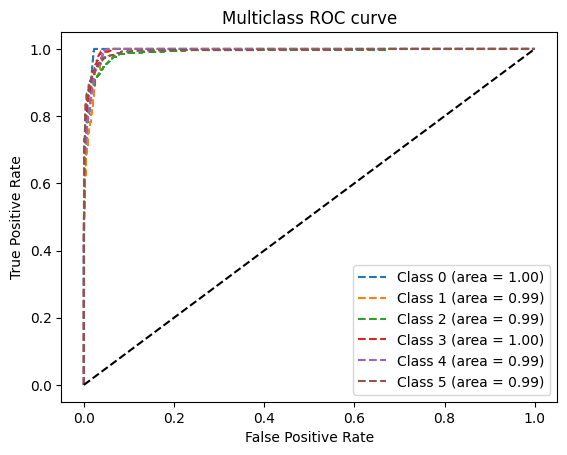

              precision    recall  f1-score   support

       amaze       0.87      0.71      0.78       124
        care       0.86      0.75      0.80       239
   happiness       0.89      0.96      0.92       981
        rage       0.92      0.89      0.90       408
       scare       0.89      0.85      0.87       358
      sorrow       0.94      0.94      0.94       890

    accuracy                           0.90      3000
   macro avg       0.89      0.85      0.87      3000
weighted avg       0.90      0.90      0.90      3000

LogisticRegression best model and ROC-AUC: LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'), 0.99
Training RandomForestClassifier...


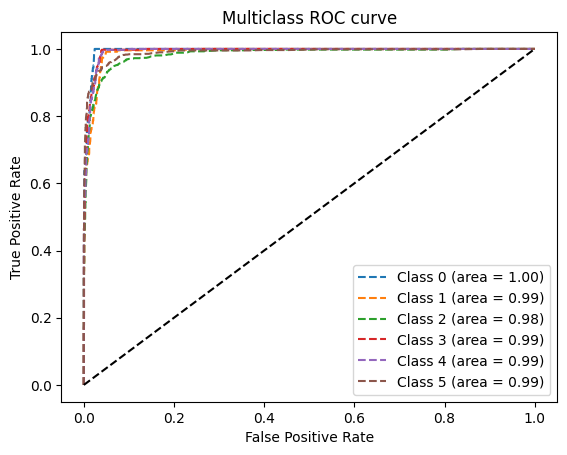

              precision    recall  f1-score   support

       amaze       0.83      0.74      0.78       124
        care       0.85      0.71      0.77       239
   happiness       0.87      0.94      0.91       981
        rage       0.88      0.87      0.88       408
       scare       0.86      0.86      0.86       358
      sorrow       0.94      0.92      0.93       890

    accuracy                           0.89      3000
   macro avg       0.87      0.84      0.85      3000
weighted avg       0.89      0.89      0.89      3000

RandomForestClassifier best model and ROC-AUC: RandomForestClassifier(n_estimators=200), 0.99
Training SVC...


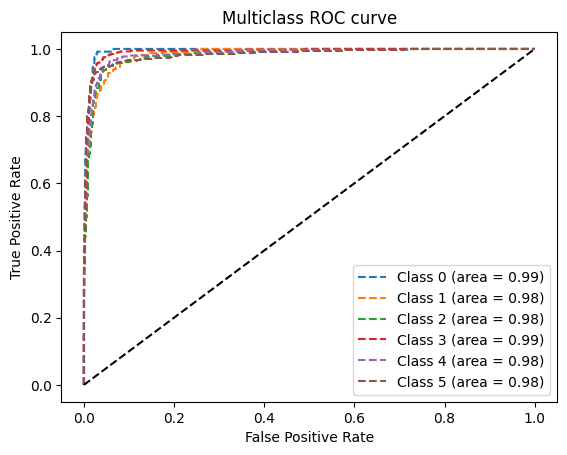

              precision    recall  f1-score   support

       amaze       0.88      0.69      0.77       124
        care       0.83      0.67      0.74       239
   happiness       0.86      0.95      0.91       981
        rage       0.90      0.87      0.88       408
       scare       0.84      0.83      0.84       358
      sorrow       0.93      0.92      0.93       890

    accuracy                           0.88      3000
   macro avg       0.87      0.82      0.84      3000
weighted avg       0.88      0.88      0.88      3000

SVC best model and ROC-AUC: SVC(C=1, kernel='linear', probability=True), 0.99


In [92]:
import warnings
warnings.filterwarnings('ignore')

#Defining the models and parameters for grid search
models_params_p2 = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['saga','liblinear'],
            'penalty': ['l1', 'l2']

        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    'SVC': {
        'model': SVC(probability=True),
        'params': {
            'C': [1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

#Encoding the string labels to integers
label_encoder_p2 = LabelEncoder()
y_train_encoded = label_encoder_p2.fit_transform(y_train_count)
y_test_encoded = label_encoder_p2.transform(y_test_count)

results = []

#Function to train and evaluate model
def train_and_evaluate(model, params, X_train, y_train, X_test, y_test):
    grid_search_p2 = GridSearchCV(model, params, cv=5, scoring='roc_auc_ovr')
    grid_search_p2.fit(X_train, y_train)
    best_model_p2 = grid_search_p2.best_estimator_
    y_pred_proba = best_model_p2.predict_proba(X_test)
    y_pred = best_model_p2.predict(X_test)

    #Reverse transformation to get original string labels
    y_pred_original_labels = label_encoder_p2.inverse_transform(y_pred)

    #Computing ROC-AUC for each class and average
    roc_auc_p2 = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")

    #Plotting ROC curve for each class
    fpr = dict()
    tpr = dict()
    thresh = dict()
    for i in range(len(best_model_p2.classes_)):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
        plt.plot(fpr[i], tpr[i], linestyle='--',
                 label='Class %s (area = %0.2f)' % (i, auc(fpr[i], tpr[i])))

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

    #Printing classification report
    print(classification_report(y_test, y_pred, target_names=label_encoder_p2.classes_))

    return best_model_p2, roc_auc_p2

#Applying grid search and evaluating each model
for name, mp in models_params_p2.items():
    print(f"Training {name}...")
    model, roc_auc = train_and_evaluate(mp['model'], mp['params'], X_train_tfidf, y_train_encoded, X_test_tfidf, y_test_encoded)
    results.append((name, model, roc_auc))
    print(f"{name} best model and ROC-AUC: {model}, {roc_auc:.2f}")


**Model Performance Summary:**

Logistic Regression: Balanced performance across all emotion categories with a macro-average precision and f1-score of 0.89 and 0.87, respectively. This model demonstrated superior handling of the "happiness" and "sorrow" emotions with good precision and recall, which shows its effectiveness in identifying both prevalent and less frequent emotions.

Random Forest Classifier: Shows good performance with a slightly lower macro-average for precision, recall, and f1-score compared to Logistic Regression, with scores of 0.87, 0.84, and 0.85 respectively. However, it maintains high accuracy and a strong weighted-average, which suggests it may perform better on imbalanced classes.

SVC (Support Vector Classifier): Delivers performance closely aligned with the Random Forest, featuring similar precision and recall metrics. With macro-average precision and f1-score at 0.87 and 0.84, the SVC is slightly less effective than Logistic Regression but might still offer better performance.

# Question 5 - Evaluation and Reporting (20 points)

- Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions


**Selected Model: Logistic Regression with C=1, penalty='l1' and, solver='liblinear'**


We selected Logistic Regression as our final model due to its excellent performance across important metrics, specifically its high macro-average precision and f1-score, which indicate good performance across all emotion categories. This model demonstrated particularly strong precision and recall for prevalent emotions such as "happiness" and "sorrow," showing good performance in predictions. Logistic Regression's advantage is its simplicity and efficiency, making it highly interpretable and easier to implement and tune compared to more complex models. This models balance of accuracy and interpretability, combined with less dependency on extensive hyperparameter tuning, makes it particularly suitable for this problem, as it might ensure reliable generalization on unseen data.

In [99]:
#We need to set X and y to run the best model on the entire data
X = tfidf_vectors
y = label_encoder_p2.fit_transform(data_problem2['Emotion'])

In [100]:
#Making predictions using the Logistic Regression model
best_model= LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

#Fitting the model on the entire dataset
best_model.fit(X, y)

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

# Question 6 : External validation (30 pt)

- A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.
- You need to generate a csv file, named as "submission.csv". This is the inference values from your selected best model on "test.csv" data.

In [101]:
#Loading the test data
test_data_path = 'test.csv'
test_data_p2 = pd.read_csv(test_data_path)

test_data_p2.head()

,Text
0,i also feel contented and humbled by this expe...
1,i t want t know f t habitual t feel frightened...
2,i feel so spiteful towards people sometimes ju...
3,i wasn t feeling hot i knew that i needed to c...
4,i feel more anxious than i have in quite some ...


In [102]:
#Applying Preprocessing on the test data using the same function preprocess_text used for training data
test_data_p2['Processed_Text_p2'] = test_data_p2['Text'].apply(preprocess_text)
test_data_p2['Processed_Text_p2'] = test_data_p2['Processed_Text_p2'].apply(lambda tokens: ' '.join(tokens))

#Vectorizing the test data TF-IDF vectorizer
test_tfidf_vectors = tfidf_vectorizer.transform(test_data_p2['Processed_Text_p2'])


In [103]:
#Predicting using the best trained model
predictions_p2 = best_model.predict(test_tfidf_vectors)

#Reverse transformation to get original string labels from the encoded ones
predictions_p2_rev_trans = label_encoder_p2.inverse_transform(predictions_p2)


In [104]:
#Saving the predictions to a DataFrame and CSV
predictions_df_p2 = pd.DataFrame(predictions_p2_rev_trans, columns=['Emotion'])
predictions_df_p2.to_csv('submission.csv', index=False)
print('Predictions saved to submission.csv')

Predictions saved to submission.csv


### Summary

For this problem, our objective was to accurately identify and categorize emotions expressed in textual data, optimizing the model to achieve good accuracy. We began by thoroughly analyzing our dataset, which included text data annotated with emotion labels like sorrow, rage, happiness, amaze, care, and scare, revealing a skewed distribution dominated by happiness and sorrow.

Our preprocessing steps were vital in cleaning and preparing the text for modeling. We removed URLs, emails, non-letter characters, and stopwords, and performed tokenization to convert text into workable data formats. Leveraging tools like CountVectorizer, TfidfVectorizer and, Word2Vec, we transformed the text into numerical features suitable for ML algorithms. We also visualized frequent words through word clouds to gain insights into prevalent themes. Moreover, we applied Latent Dirichlet Allocation (LDA) to discover hidden themes within the text, setting the model to identify eight distinct topics. This technique enabled us to extract and examine the top ten keywords for each topic, offering a deep insight into the prevalent emotional contexts and vocabularies within the dataset.

For the model training, we experimented with three different classifiers: Logistic Regression, Random Forest, and SVC. Each model was tuned using grid search and evaluated based on ROC-AUC scores and other metrics like precision, recall, and f1-score. The Logistic Regression Model emerged as the most suitable choice, particularly due to its superior performance in handling the class imbalances evident in our dataset. It showed the highest weighted-average precision, recall, and f1-score, suggesting it could effectively manage the dataset's skew towards certain emotions. We implemented this model to the test set and generated the prediction csv file.